# Modelos de neurônios de disparo

In [1]:
import numpy as np # processamento matemático
import matplotlib.pyplot as plt # criação de gráficos
from scipy.integrate import solve_ivp # solucionar eq. dif.

## Modelos
Os modelos abaixo simulam o disparo de potenciais de ação, o mecanismo usado pelos neurônios para transmissão de informação. [[1](#1-Claren-Tan,-Markp-Sarlika-&-Nikola-Kasabov,-%22Spiking-Neural-Networks:-Background,-Recent-Development-and-the-NeuCube-Architecture%22,-Neural-Processing-Letters-(2020)-52:1675-1701)]

|Modelos | N. de variáveis | Complexidade | Biologicamente plausível|
--- | --- | --- | ---
|Leaky integrate-and-fire|1|Muito baixa|Não|
|Izhikevich|2|Muito baixa|Não|
|SRM|1|Baixa|Não|
|Hodgkin-Huxley|4|Muito alta|Sim|
|FitzHugh-Nagumo|2|Média|Não|
|Wilson|2|Média|Não|
|Moris-Lecar|3|Alta|Sim|

### Leaky integrate-and-fire

O modelo Leaky integrate-and-fire (LIF) é composto por apenas uma equação diferencial, que representa o comportamento do circuito abaixo:
![teste](imagens/circuito_lif.svg)

No circuito, a capacitância $C_m$ representa a capaciância da membrana bilipídica do neurônio. O potencial de membrana $V_m$ se altera com a entrada/saída de íons através de canais existentes ao longo da membrana do neurônio, bem como com a aplicação de uma corrente $I_{ap}$. Nesse modelo, apenas o canal de vazamento (_leak_) é representado, através do potencial de vazamento $E_L$ e a condutância de vazamento $G_L$ (o inverso da resistência). A dinâmica de alteração do potencial de membrana é dada pela seguinte equação:

$
c_m\frac{dV_m}{dt} = G_L(E_L-V_m)+I_{ap}; \text{se } V_m > V_{th} \text{ então } V_m\mapsto V_{reset}
$

A parte direita da equação é uma condição em que se o potencial de membrana ultrapassar um determinado limiar $V_{th}$, caracterizando o disparo (_fire_) de um potencial de ação, então o valor do potencial é atualizado para um valor de _reset_ $V_{reset}$. [[2](#2-Paul-Miller,-%22An-introductory-course-in-computational-neuroscience%22,-The-MIT-Press,-2018)]

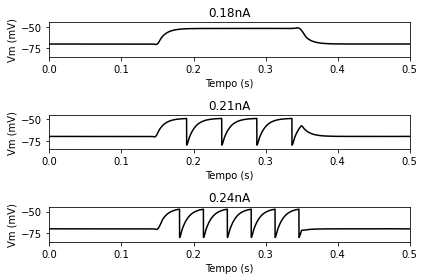

In [2]:
def lif(t, v, gl, el, cm, iap, vth, vr):
    # no intervalo de 0.15 até 0.35 a corrente é aplicada
    if t > 0.15 and t < 0.35:
        i = iap
    else: # no resto do tempo a corrente é 0
        i = 0
    dvdt = (gl*(el-v) + i)/cm # calcula a equação diferencial
    # [-1] indica o último elemento do vetor
    # nesse caso, significa o último potencial calculado
    if v[-1] > vth: # se o potencial ultrapasssar o limiar
        v[-1] = vr  # muda o potencial para o valor de reset
    return dvdt

# parametros de simulação
t0 = 0 # tempo inicial
tf = 0.5 # tempo final
dt = 0.0001 # passo de tempo
tvec = np.arange(t0, tf, dt) # vetor de pontos no tempo

# parametros do neuronio lif
tau = 0.010 # constante de tempo da membrana
el = -0.070 # potencial de vazamento (ou potencial de repouso)
vth = -0.050 # potencial de limiar
vr = -0.080 # potencial de reset
cm = 100*10**(-12) # capacitância de membrana total
gl = cm/tau # condutância de membrana total (condutância de vazamento)
v0 = el # o potência de membrana inicia no potencial de repouso

# simulacao de trials
iap = np.array([180, 210, 240])*(10**(-12)) # valores de corrente aplicados

ntrials = len(iap) # numero total de trials
_, ax = plt.subplots(ntrials) # cria conjunto de figuras
for trial in range(ntrials): # laço ao longo dos trials
    parametros = [gl, el, cm, iap[trial], vth, vr] # agrupa os parâmetros
    sol = solve_ivp(lif, [t0, tf], [v0], t_eval=tvec, args=parametros)

    ax[trial].plot(sol.t,sol.y[0]*1000, 'k') # plota o potencial vs tempo
    ax[trial].set_xlim(0, 0.5) # ajusta a escala em x
    ax[trial].set_ylim(1000*(vr-0.005), 1000*(vth+0.005)) # e em y
    ax[trial].set_xlabel('Tempo (s)') # nomeia o eixo x
    ax[trial].set_ylabel('Vm (mV)') # nomeia o eixo y da segunda linha
    ax[trial].set_title(f'{str(iap[trial]*10**9)}nA') # o título é a corrente
plt.tight_layout()
plt.show() # exibe a figura

## Referências

### 1 Claren Tan, Markp Sarlika & Nikola Kasabov, "Spiking Neural Networks: Background, Recent Development and the NeuCube Architecture", Neural Processing Letters (2020) 52:1675-1701

### 2 Paul Miller, "An introductory course in computational neuroscience", The MIT Press, 2018